# Tseting dollar cost averaging

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as s

In [368]:
# df = pd.read_csv("../data/btc.csv") 
df = pd.read_csv("../data/ft-dca-test.csv")
df.dropna(inplace=True)

In [369]:
df = df[:1800]

In [370]:
median = s.median(list(df.close))
median

56469.58

In [371]:
buy_times = 0
purchased_amount = 0.
i = 0
plot = []
while i < len(df):
    buy_times += 1
    purchased_amount += 100./df.iloc[i].close
    plot.append(df.iloc[i].close)
    plot = list(plot) + list(np.full(29, None))
    i += 30
plot = plot[:2000]

In [372]:
buy_times_ml = 0
purchased_amount_ml = 0.
saved = 30
cooldown = 0
plotml = []
for i in range(len(df)):
    if df.iloc[i].target == 1 and saved>=30 and cooldown==0:
        buy_times_ml += 1
        purchased_amount_ml += 100./df.iloc[i].close
        saved -= 30
        cooldown += 4
        plotml.append(df.iloc[i].close)
    else:
        plotml.append(None)
    saved += 1
    cooldown -= 1 if cooldown > 0 else 0
    


In [373]:
buy_times, buy_times_ml

(60, 41)

In [374]:
purchased_amount, purchased_amount_ml

(0.1078761383074395, 0.07877849217414967)

In [375]:
buy_times*100/median

0.10625189703907838

In [376]:
d = df[:]

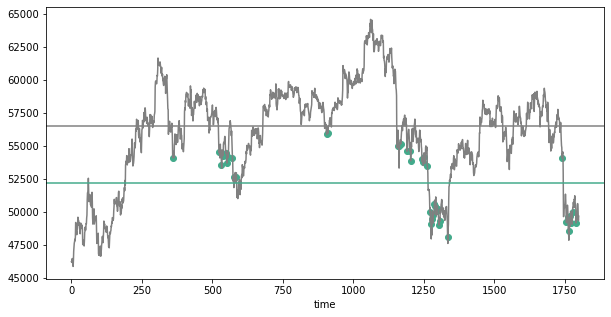

In [387]:
fig,ax = plt.subplots(figsize=(10, 5))

ax.scatter(range(len(df)),
        plotml,
        color="#43aa8b")

ax.plot(d.close,
        color="gray")
ax.set_xlabel("time")

ax.axhline(y=56469.58, color='gray', linestyle='-')
ax.axhline(y=52160.866, color="#43aa8b", linestyle='-')


plt.show()


In [378]:
s.mean(list(filter(lambda x: x != None, plot)))

55871.698

In [379]:
s.mean(list(filter(lambda x: x != None, plotml)))

52160.866097560975

In [380]:
median

56469.58